## Question 1

Occupations
Step 1. Import the necessary libraries
Step 2. Import the dataset from this address.
Step 3. Assign it to a variable called users
Step 4. Discover what is the mean age per occupation
Step 5. Discover the Male ratio per occupation and sort it from the most to the least
Step 6. For each occupation, calculate the minimum and maximum ages
Step 7. For each combination of occupation and sex, calculate the mean age
Step 8. For each occupation present the percentage of women and men

In [37]:
#importing libraries
import numpy as np

url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user"   #importing URL
users = pd.read_csv(url, sep='|', index_col='user_id')       #assigning variable as users

users.head()  #verifying the dataset


,age,gender,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213


In [38]:
#mean age per occupation
def mean_age_per_occupation(users):
    return users.groupby('occupation')['age'].mean()
mean_age_result = mean_age_per_occupation(users)
print("\nMean Age per Occupation")
print(mean_age_result)


# Male ratio per occupation with sorting most to least
def male_ratio_per_occupation(users):
    gender_count = users.groupby(['occupation', 'gender']).size()
    male_count = gender_count.loc[:, 'M']
    total_count = gender_count.groupby('occupation').sum()
    ratio = male_count / total_count
    return ratio.sort_values(ascending=False)

male_ratio_result = male_ratio_per_occupation(users)
print("\nMale Ratio per Occupation")
print(male_ratio_result)

# Minimum and maximum ages by occupation
def min_max_age_per_occupation(users):
    return users.groupby('occupation')['age'].agg(['min', 'max'])

min_max_age_result = min_max_age_per_occupation(users)
print("\nMinimum and Maximum Ages by Occupation")
print(min_max_age_result)

# mean age by occupation and sex
def mean_age_per_occupation_sex(users):
    return users.groupby(['occupation', 'gender'])['age'].mean()

mean_age_sex_result = mean_age_per_occupation_sex(users)
print("\nMean Age per Occupation and Sex")
print(mean_age_sex_result)


# percentage of women and men per occupation
def gender_percentage_per_occupation(users):
    gender_count = users.groupby(['occupation', 'gender']).size()
    total_count = gender_count.groupby('occupation').sum()
    percentage = gender_count / total_count * 100
    return percentage

gender_percentage_result = gender_percentage_per_occupation(users)
print("\nGender Percentage per Occupation")
print(gender_percentage_result)



Mean Age per Occupation
occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

Male Ratio per Occupation
occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other            0.65

## Question 2

Euro Teams
Step 1. Import the necessary libraries
Step 2. Import the dataset from this address
Step 3. Assign it to a variable called euro12
Step 4. Select only the Goal column
Step 5. How many team participated in the Euro2012?
Step 6. What is the number of columns in the dataset?
Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline
Step 8. Sort the teams by Red Cards, then to Yellow Cards
Step 9. Calculate the mean Yellow Cards given per Team
Step 10. Filter teams that scored more than 6 goalsStep 11. Select the teams that start with G
Step 12. Select the first 7 columns
Step 13. Select all columns except the last 3
Step 14. Present only the Shooting Accuracy from England, Italy and Russia

In [48]:
# Step 2: Import the necessary libraries
import pandas as pd

#importing and assigning variable
euro12 = pd.read_csv("https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv")

#verifying the dataset
print(euro12.head())

             Team  Goals  Shots on target  Shots off target Shooting Accuracy  \
0         Croatia      4               13                12             51.9%   
1  Czech Republic      4               13                18             41.9%   
2         Denmark      4               10                10             50.0%   
3         England      5               11                18             50.0%   
4          France      3               22                24             37.9%   

  % Goals-to-shots  Total shots (inc. Blocked)  Hit Woodwork  Penalty goals  \
0            16.0%                          32             0              0   
1            12.9%                          39             0              0   
2            20.0%                          27             1              0   
3            17.2%                          40             0              0   
4             6.5%                          65             1              0   

   Penalties not scored  ...  Saves ma

In [51]:
# only the Goal column
goals = euro12['Goals']

# Number of teams participated
num_teams = euro12['Team'].nunique()
print("Number of teams participated =", num_teams)


# Number of columns
num_columns = len(euro12.columns)
print("\nNumber of columns =", num_columns)


# new column discipline
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
print("\nUser-defined Column: 'discipline':\n", discipline)


# Sort teams by Red Cards and then Yellow Cards
redcard_yellowcard = discipline.sort_values(by=['Red Cards', 'Yellow Cards'], ascending=False)
print("\nUser defined Column: 'Red Card/Yellow Card':\n", redcard_yellowcard)


# mean of Yellow Cards per team
mean_yellow_cards = discipline['Yellow Cards'].mean()
print("\nMean Yellow Cards per Team =", mean_yellow_cards)


# teams with more than 6 goals
high_scoring_teams = euro12[euro12['Goals'] > 6]
print("\nTeams that scored more than 6 goals:\n", high_scoring_teams)


# teams that start with 'G'
teams_starting_with_G = euro12[euro12['Team'].str.startswith('G')]
print("\nTeams that start with 'G':\n", teams_starting_with_G)


# first 7 columns
first_7_columns = euro12.iloc[:, :7]
print("\nFirst 7 columns:\n", first_7_columns)


# Select all columns except the last 3
all_except_last_3_columns = euro12.iloc[:, :-3]
print("\nAll columns except the last 3:\n", all_except_last_3_columns)


# hooting Accuracy of England, Italy, and Russia
shooting_accuracy = euro12.loc[euro12['Team'].isin(['England', 'Italy', 'Russia']), ['Team', 'Shooting Accuracy']]
print("\nShooting Accuracy of England, Italy, and Russia:\n", shooting_accuracy)


Number of teams participated = 16

Number of columns = 35

User-defined Column: 'discipline':
                    Team  Yellow Cards  Red Cards
0               Croatia             9          0
1        Czech Republic             7          0
2               Denmark             4          0
3               England             5          0
4                France             6          0
5               Germany             4          0
6                Greece             9          1
7                 Italy            16          0
8           Netherlands             5          0
9                Poland             7          1
10             Portugal            12          0
11  Republic of Ireland             6          1
12               Russia             6          0
13                Spain            11          0
14               Sweden             7          0
15              Ukraine             5          0

User defined Column: 'Red Card/Yellow Card':
                    Team  

## Question 3

Housing
Step 1. Import the necessary libraries
Step 2. Create 3 differents Series, each of length 100, as follows:
• The first a random number from 1 to 4
• The second a random number from 1 to 3
• The third a random number from 10,000 to 30,000
Step 3. Create a DataFrame by joinning the Series by column
Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter
Step 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'
Step 6. Ops it seems it is going only until index 99. Is it true?
Step 7. Reindex the DataFrame so it goes from 0 to 299

In [56]:
import pandas as pd #importing libraries

# random series creation 1,2,3
s1 = pd.Series(np.random.randint(1, 5, 100))
s2 = pd.Series(np.random.randint(1, 4, 100))
s3 = pd.Series(np.random.randint(10000, 30001, 100))

# concatenate the series to housing
housing = pd.concat([s1, s2, s3], axis=1)

# rename the columns
housing.columns = ['bedrs', 'bathrs', 'price_sqr_meter']
print("\nHousing:\n", housing)

# merged column BIGCOLUMN
bigcolumn = pd.concat([series1, series2, series3], ignore_index=True)
print("\nBig Column:\n", bigcolumn)

# is the index only till 99 of bigcolumn?
print("\nIs it true that 'bigcolumn' goes only until index 99?", bigcolumn.index.max() == 99)

# Reindex big column from 0 to 299
bigcolumn = bigcolumn.reset_index(drop=True)


Housing:
     bedrs  bathrs  price_sqr_meter
0       2       2            19959
1       4       1            29728
2       4       1            24928
3       1       1            17374
4       3       1            23573
..    ...     ...              ...
95      1       1            23076
96      2       1            28235
97      4       2            16146
98      1       2            13192
99      1       2            14682

[100 rows x 3 columns]

Big Column:
 0          4
1          1
2          4
3          2
4          3
       ...  
295    27569
296    23003
297    26678
298    23921
299    28731
Length: 300, dtype: int32

Is it true that 'bigcolumn' goes only until index 99? False


## Question 4

The data have been modified to contain some missing values, identified by NaN.
You should be able to perform all of these operations without using a for loop or other looping construct.

The first three columns are year, month, and day. The remaining 12 columns are average windspeeds in knots at 12 locations in Ireland on that day.
Step 1. Import the necessary libraries
Step 2. Import the dataset from the attached file wind.txt
Step 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index.
Step 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it.
Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].
Step 6. Compute how many values are missing for each location over the entire record.They should be ignored in all calculations below.
Step 7. Compute how many non-missing values there are in total.
Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times.
A single number for the entire dataset.
Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days
A different set of numbers for each location.
Step 10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day.
A different set of numbers for each day.
Step 11. Find the average windspeed in January for each location.
Treat January 1961 and January 1962 both as January.
Step 12. Downsample the record to a yearly frequency for each location.
Step 13. Downsample the record to a monthly frequency for each location.
Step 14. Downsample the record to a weekly frequency for each location.
Step 15. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.

In [72]:
import pandas as pd
import numpy as np

# import dataset and assign a variable DATA, along with proper datetime index
#data[['Yr', 'Mo', 'Dy']] = data[['Yr', 'Mo', 'Dy']].fillna(0).astype(int)

#data['Date'] = pd.to_datetime(data[['Yr', 'Mo', 'Dy']], format='%y%m%d', errors='coerce')

# Drop the original year, month, and day columns
#data = data.drop(['Yr', 'Mo', 'Dy'], axis=1)

# Set the right dates as the index
#data = data.set_index('Date')

# No need to replace the year again, as the index is already in datetime format
#data.index = pd.to_datetime(data.index)

# find missing values
missing_values_per_location = data.isnull().sum()
print("\nMissing values per location")
print(missing_values_per_location)

# computing non missing values
non_missing_values_count = data.count().sum()
print("\nNon-missing values count")
print(non_missing_values_count)

# mean windspeedsof all locations and times
mean_windspeed = data.stack().mean()
print("\nMean windspeed over all locations and times")
print(mean_windspeed)

# new dataframe loc_stats
loc_stats = pd.DataFrame({
    'min': data.min(),
    'max': data.max(),
    'mean': data.mean(),
    'std': data.std()
})
print("\nLocation Stats- Min, Max, Mean, and Std for each location")
print(loc_stats)

#new dataframe day_stats
day_stats = pd.DataFrame({
    'min': data.min(axis=1),
    'max': data.max(axis=1),
    'mean': data.mean(axis=1),
    'std': data.std(axis=1)
})
print("\nDay Stats - Min, Max, Mean, and Std for each day")
print(day_stats)

# average windspeed in January for each location
january_average = data[data.Mo == 1].mean()
print("\nAverage windspeed for each location in January")
print(january_average)

# downsampling to yearly frequency for each location
yearly_data = data.resample('Y').mean()
print("\nYearly frequency for each location")
print(yearly_data)

# downsampling to a monthly frequency for each location
monthly_data = data.resample('M').mean()
print("\nMonthly frequency for each location")
print(monthly_data)

# downsampling a weekly frequency for each location
weekly_data = data.resample('W-Mon').mean()
print("\nWeekly frequency for each location")
print(weekly_data)

# min, max and mean windspeeds and standard deviations of the windspeeds
weekly_allstats = data.resample('W-Mon').agg(['min', 'max', 'mean', 'std']).head(52)
print("\nWeekly stats for the first 52 weeks")
print(weekly_allstats)




Missing values per location
Yr     0
Mo     0
day    0
RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

Non-missing values count
98579

Mean windspeed over all locations and times
14.3004009981842

Location Stats- Min, Max, Mean, and Std for each location
       min    max       mean       std
Yr   61.00  78.00  69.500304  5.188131
Mo    1.00  12.00   6.523274  3.448871
day   1.00  31.00  15.728628  8.800335
RPT   0.67  35.80  12.362987  5.618413
VAL   0.21  33.37  10.644314  5.267356
ROS   1.50  33.84  11.660526  5.008450
KIL   0.00  28.46   6.306468  3.605811
SHA   0.13  37.54  10.455834  4.936125
BIR   0.00  26.16   7.092254  3.968683
DUB   0.00  30.37   9.797343  4.977555
CLA   0.00  31.08   8.495053  4.499449
MUL   0.00  25.88   8.493590  4.166872
CLO   0.04  28.21   8.707332  4.503954
BEL   0.13  42.38  13.121007  5.835037
MAL   0.67  42.54  15.599079  6.699794

Day Stats - Min, Max, Mean, and Std for each 

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

## Question 5

Step 1. Import the necessary libraries
Step 2. Import the dataset from this address.
Step 3. Assign it to a variable called chipo.
Step 4. See the first 10 entries
Step 5. What is the number of observations in the dataset?
Step 6. What is the number of columns in the dataset?
Step 7. Print the name of all the columns.
Step 8. How is the dataset indexed?
Step 9. Which was the most-ordered item?
Step 10. For the most-ordered item, how many items were ordered?
Step 11. What was the most ordered item in the choice_description column?
Step 12. How many items were orderd in total?
Step 13.
• Turn the item price into a float
• Check the item price type
• Create a lambda function and change the type of item price
• Check the item price type
Step 14. How much was the revenue for the period in the dataset?
Step 15. How many orders were made in the period?
Step 16. What is the average revenue amount per order?
Step 17. How many different items are sold?

In [23]:
import pandas as pd

url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"
chipo = pd.read_csv(url, sep='\t')

print(chipo.head(10)) # read first 10 lines


num_observations = len(chipo)
print(f"\nNumber of observations: {num_observations}") # calculate number of observations


num_columns = chipo.shape[1]          #number of columns
print(f"\nNumber of columns: {num_columns}")

print("\nColumns:", chipo.columns)      #print column names


print("\nIndex:", chipo.index)          #indexing

most_ordered_item = chipo['item_name'].value_counts().idxmax()     #finding the most ordered item
print(f"\nMost-ordered item: {most_ordered_item}")

quantity_ordered = chipo[chipo['item_name'] == most_ordered_item]['quantity'].sum() #how many orders for most ordered item
print(f"\nQuantity ordered for the most-ordered item: {quantity_ordered}")

most_ordered_choice = chipo['choice_description'].value_counts().idxmax()  #most ordered in choice description
print(f"\nMost-ordered item in choice_description: {most_ordered_choice}")

total_items_ordered = chipo['quantity'].sum()             #total ordered items
print(f"\nTotal items ordered: {total_items_ordered}")


chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))  #changing item price to float with lamda function
print("\nItem price type:", chipo['item_price'].dtype)            #check item price type


revenue = (chipo['quantity'] * chipo['item_price']).sum()   #total revenue
print(f"\nRevenue for the period: ${revenue:.2f}")

num_orders = chipo['order_id'].nunique()                #total orders made
print(f"\nNumber of orders made: {num_orders}")


avg_revenue_per_order = revenue / num_orders           #average revenue per order
print(f"\nAverage revenue amount per order: ${avg_revenue_per_order:.2f}")


num_different_items = chipo['item_name'].nunique()              #distint sold items
print(f"\nNumber of different items sold: {num_different_items}")


   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3                              

## Question 6

Create a line plot showing the number of marriages and divorces per capita in the U.S. between 1867 and 2014. Label both lines and show the legend.
Don't forget to label your axes!

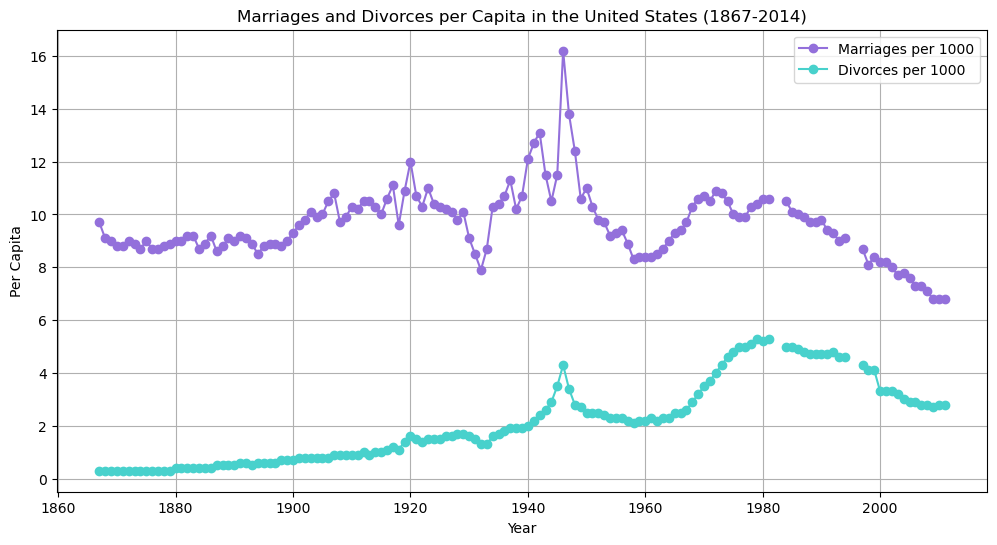

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('us-marriages-divorces-1867-2014.csv')# Loading the CSV

plt.figure(figsize=(12, 6))# line plot


plt.plot(df['Year'], df['Marriages_per_1000'], 
         label='Marriages per 1000', color='mediumpurple', marker='o')# Plotting lines
plt.plot(df['Year'], df['Divorces_per_1000'], 
         label='Divorces per 1000', color='mediumturquoise', marker='o')

plt.xlabel('Year')# Adding labels, title and legend
plt.ylabel('Per Capita')
plt.title('Marriages and Divorces per Capita in the United States (1867-2014)')
plt.legend()

plt.grid(True)
plt.show() # Show the line plot


## Question 7

Create a vertical bar chart comparing the number of marriages and divorces per capita in the U.S. between 1900, 1950, and 2000.
Don't forget to label your axes!

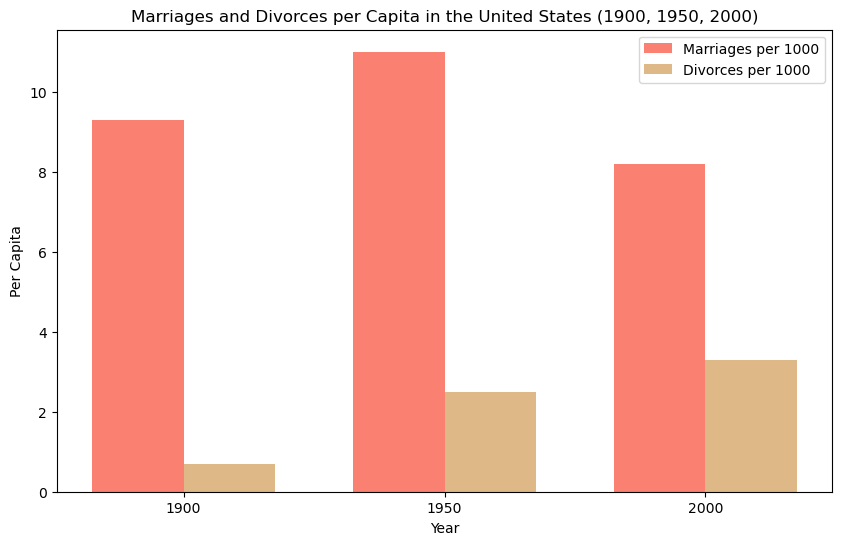

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('us-marriages-divorces-1867-2014.csv')# Loading the CSV file

selected_years = df[df['Year'].isin([1900, 1950, 2000])]# Filtering rows for the years 1900, 1950 and 2000

plt.figure(figsize=(10, 6))# Create a vertical bar chart

marriage_positions = range(len(selected_years))               # Bar positions
divorce_positions = [pos + bar_width for pos in marriage_positions]

marriage_heights = selected_years['Marriages_per_1000']       # Bar heights
divorce_heights = selected_years['Divorces_per_1000']

plt.bar(marriage_positions, marriage_heights, width=bar_width, label='Marriages per 1000', color='salmon') # Plotting
plt.bar(divorce_positions, divorce_heights, width=bar_width, label='Divorces per 1000', color='burlywood')


plt.xlabel('Year')     # Adding labels and title
plt.ylabel('Per Capita')
plt.title('Marriages and Divorces per Capita in the United States (1900, 1950, 2000)')
plt.xticks([pos + bar_width / 2 for pos in marriage_positions], selected_years['Year'])
plt.legend()


plt.show()# Show the bar chart


## Question 8

Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort the actors by their kill count and label each bar with the corresponding actor's name. Don't forget to label your axes!

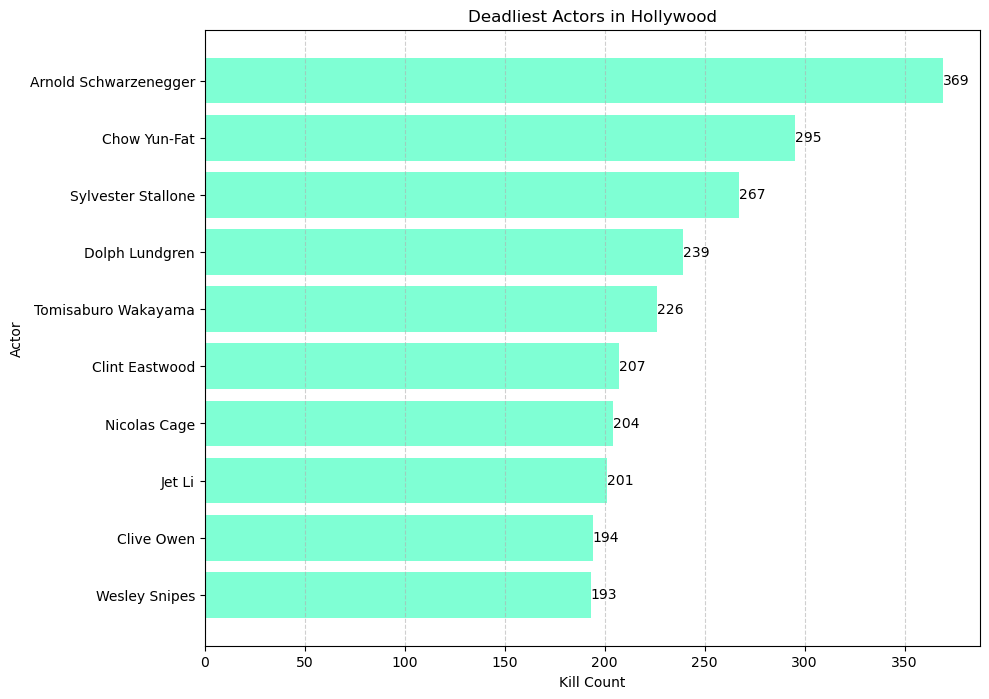

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('actor_kill_counts.csv') # Loading the CSSV file 

df_sorted = df.sort_values(by='Count', ascending=True) # Sorting the data by the Count column

plt.figure(figsize=(10, 8)) # Creating a horizontal bar chart
plt.barh(df_sorted['Actor'], df_sorted['Count'], color='aquamarine')
plt.xlabel('Kill Count')
plt.ylabel('Actor')
plt.title('Deadliest Actors in Hollywood')
plt.grid(axis='x', linestyle='--', alpha=0.6)

for index, value in enumerate(df_sorted['Count']):
    plt.text(value, index, str(value), ha='left', va='center', fontsize=10) # Labeling the bar with the actor's name

plt.show() # Show the bar chart

## Question 9

Create a pie chart showing the fraction of all Roman Emperors that were assassinated.
Make sure that the pie chart is an even circle, labels the categories, and shows the percentage breakdown of the categories.

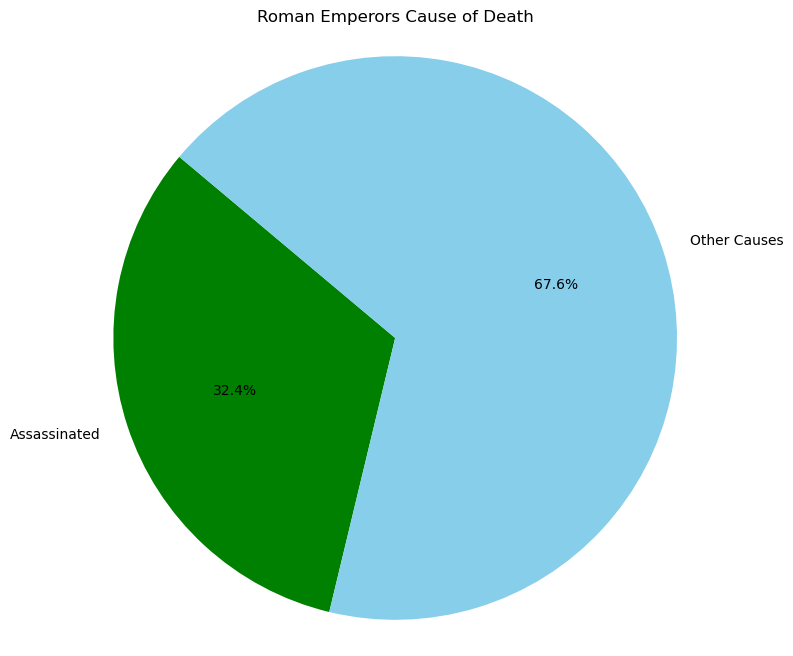

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'roman-emperor-reigns.csv' # Loading the file
df = pd.read_csv(file_path)

assassinated_emperors = df[df['Cause_of_Death'] == 'Assassinated'] # assasinated emperors

assassinated_percentage = (len(assassinated_emperors) / len(df)) * 100 # percentage of assassinated emperors

other_percentage = 100 - assassinated_percentage # emperors who died from other causes in percentage

labels = ['Assassinated', 'Other Causes'] # Create a pie chart
sizes = [assassinated_percentage, other_percentage]
colors = ['green', 'skyblue']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Roman Emperors Cause of Death')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular


plt.show() # Show the pie chart


## Question 10

Create a scatter plot showing the relationship between the total revenue earned by arcades and the number of Computer Science PhDs awarded in the U.S. between 2000 and 2009.
Don't forget to label your axes!
Color each dot according to its year.

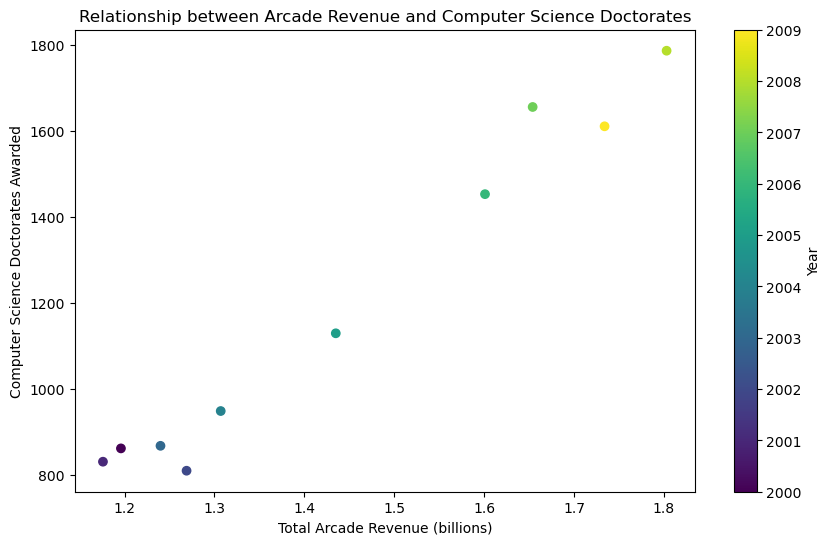

In [3]:
import pandas as pd                  #importing the libraries
import matplotlib.pyplot as plt

file_path = 'arcade-revenue-vs-cs-doctorates.csv'
df = pd.read_csv(file_path)                # Loading the CSV file

plt.figure(figsize=(10, 6))    # Create a scatter plot

scatter = plt.scatter(df['Total Arcade Revenue (billions)'], 
                      df['Computer Science Doctorates Awarded (US)'], c=df['Year'], cmap='viridis') # Scatter plot with color based on the YEAR

plt.xlabel('Total Arcade Revenue (billions)')  # Adding labels and titles
plt.ylabel('Computer Science Doctorates Awarded')
plt.title('Relationship between Arcade Revenue and Computer Science Doctorates')

cbar = plt.colorbar(scatter) # Add a colorbar to scatterplot
cbar.set_label('Year') 

plt.show() # Show the plot
